### Basic preparation

import necessory packages

In [1]:
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

### A basic linear function

Say that we have a basic linear function:

y = a*x + b

It is very easy for us to caculate the target y if we have the value of x

In [2]:
a = 3
b = 4
x = np.array([1,2])
y = a*x + b

In [3]:
print(x)
print(y)

[1 2]
[ 7 10]


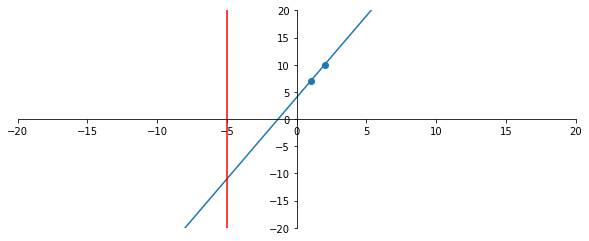

In [4]:

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


plt.xlim(-20,20)
plt.ylim(-20,20)

line_x = np.array([-50,50])
line_y = a*line_x + b

plt.plot(line_x,line_y)

plt.axvline(-5,color='r')

plt.scatter(x,y)

### If we only have x and y, can we find out the linear function?

training_x = [1, 2]

training_y = [7, 10]

traing_x * a + b = traing_y

a = ?

b = ?


In [5]:
training_x = np.array([1, 2])
training_y = np.array([7, 10])

# traing_x * a + b = traing_y

# a = ?

# b = ?

#### Maybe we can guess the answer!

Select [1,7] as the sample, that means x = 1, y = 7

guess_a = 8

guess_b = 8

In [5]:
guess_a = 8
guess_b = 8

sample_x = 1
sample_y = 7

guessing_y = sample_x * guess_a + guess_b

guessing_y

16

In [6]:
print ('Guessing Answer: ')
print (guessing_y)

print ('Real Answer: ')
print (sample_y)

print ('Different: ')
print (guessing_y - sample_y)

print ('Loss: ')
print (np.square(guessing_y - sample_y))

Guessing Answer: 
16
Real Answer: 
7
Different: 
9
Loss: 
81


#### Ajusting the guessing answer

Wow, bad luck! 

Seems that we didn't guess the right answer.

While, we got a feedback about how far it is from the right answer.

Keep b = 8, then try a from -50 to 50


In [7]:
a_array = np.array(range(-50, 50))

b_array = np.ones(100) * guess_b

In [8]:
guessing_y = sample_x * a_array + b_array

In [10]:
guessing_y

array([-42., -41., -40., -39., -38., -37., -36., -35., -34., -33., -32.,
       -31., -30., -29., -28., -27., -26., -25., -24., -23., -22., -21.,
       -20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,
        -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
         2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
        46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.])

In [11]:
guessing_loss = np.square(guessing_y - sample_y)
# print ('Loss: ')
# print (guessing_loss)

In [12]:
min_loss = guessing_loss[0]
min_a = a_array[0]
for (t_a, t_loss) in zip(a_array, guessing_loss):
    if t_loss < min_loss:
        min_a = t_a
        min_loss = t_loss
        
print ('The smallest error: '+ str(min_loss) + ' is from a = ' + str(min_a))

The smallest error: 0.0 is from a = -1


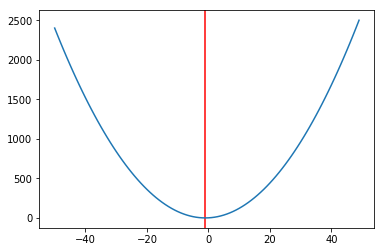

In [13]:
fig = plt.figure()

plt.axvline(min_a,color='r')

plt.plot(a_array, np.square(guessing_y - sample_y))

#### guessing b right now, keep a = 8



In [14]:
a_array = np.ones(100) * guess_a

b_array = np.array(range(-50, 50))

sample_x = 1

sample_y = 7


In [15]:
guessing_y = sample_x * a_array + b_array

In [16]:
guessing_loss = np.square(guessing_y - sample_y)
# print ('Loss: ')
# print (guessing_loss)

In [17]:
min_loss = guessing_loss[0]
min_b = b_array[0]
for (t_b, t_loss) in zip(b_array, guessing_loss):
    if t_loss < min_loss:
        min_b = t_b
        min_loss = t_loss
        
print ('The smallest error: '+ str(min_loss) + ' is from b = ' + str(min_b))

The smallest error: 0.0 is from b = -1


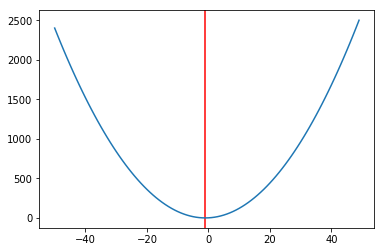

In [18]:
fig = plt.figure()

plt.axvline(min_b,color='r')

plt.plot(b_array, guessing_loss)

### Catulating the direction of movement

In fact, we will not guess all the possible values of a and b, we will caculate the derivative of a and b.

$(y-\hat{y})^2$

$= y^2 - 2y\hat{y} + \hat{y}^2$

$= (ax + b)^2 - 2(ax+b)\hat{y} + \hat{y}^2$

$= a^2x^2 + 2abx + b^2 -2ax\hat{y} - 2b\hat{y} + \hat{y}^2$

a related item: $a^2x^2 + 2abx -2ax\hat{y}$

derivative: $2ax^2 + 2bx -2x\hat{y}$

b related item: $2abx + b^2  - 2b\hat{y}$

derivative: $2ax + 2b  - 2\hat{y}$



#### Define method of derivative

In [19]:
def derivative_a(x, y, a, b):
    result = 2*a*np.square(x) + 2*b*x - 2*x*y
    return result

def derivative_b(x, y, a, b):
    result = 2*a*x + 2*b - 2*y
    return result

In [20]:
training_x = np.array([1, 2])
training_y = np.array([7, 10])

In [30]:

guess_a = 8
guess_b = 8

step_size = 0.01

g_a_list = []
g_b_list = []
error_list = []

for i in range(5000):
    d_a_s1 = derivative_a(1,7,guess_a,guess_b)
    d_b_s1 = derivative_b(1,7,guess_a,guess_b)
    
    d_a_s2 = derivative_a(2,10,guess_a,guess_b)
    d_b_s2 = derivative_b(2,10,guess_a,guess_b)
    
    d_a = (d_a_s1 + d_a_s2)/2
    d_b = (d_b_s1 + d_b_s2)/2
    

    guess_a = guess_a - step_size*d_a
    guess_b = guess_b - step_size*d_b
    
    g_a_list.append(guess_a)
    g_b_list.append(guess_b)
    error_1 = np.square(7 - 1*guess_a - guess_b)
    error_2 = np.square(10 - 2*guess_a - guess_b)
    average_error = (error_1 + error_2)/2
    error_list.append(average_error)

    if i==1 or i%100 == 0:
        print ('----------------')
        print ('Derivative:' + str((d_a, d_b)))
        print ('Guess     :' + str((guess_a, guess_b)))
        print ('S1 Error  :' + str((np.square(7 - 1*guess_a - guess_b))))
        print ('S2 Error  :' + str((np.square(10 - 2*guess_a - guess_b))))
        
        
        
        


----------------
Derivative:(37.0, 23.0)
Guess     :(7.63, 7.77)
S1 Error  :70.55999999999997
S2 Error  :169.78089999999997
----------------
Derivative:(34.46, 21.43)
Guess     :(7.2854, 7.5557)
S1 Error  :61.48284921
S2 Error  :147.05200225000002
----------------
Derivative:(-0.020731501232734928, 0.10189708508479)
Guess     :(2.653053057292489, 4.570660958271305)
S1 Error  :0.05004796075967746
S2 Error  :0.015186354332408697
----------------
Derivative:(-0.04430570738036188, 0.07174452105068063)
Guess     :(2.696598079161038, 4.490922282183982)
S1 Error  :0.03516388591896714
S2 Error  :0.01342853583074796
----------------
Derivative:(-0.03830871153882942, 0.0619848438404107)
Guess     :(2.7378111325164975, 4.424230505380137)
S1 Error  :0.026257492412224304
S2 Error  :0.01002946759392475
----------------
Derivative:(-0.03310463488976634, 0.05356442447515963)
Guess     :(2.7734285031438852, 4.366600382800346)
S1 Error  :0.01960808889878243
S2 Error  :0.007489623503445644
--------------

In [22]:
g_a_array = np.array(g_a_list)
g_b_array = np.array(g_b_list)
error_array = np.array(error_list)


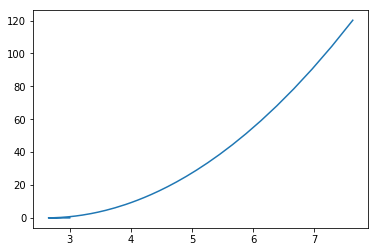

In [23]:
fig = plt.figure()

plt.plot(g_a_array, error_array)

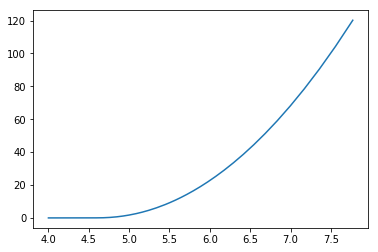

In [24]:
fig = plt.figure()

plt.plot(g_b_array, error_array)

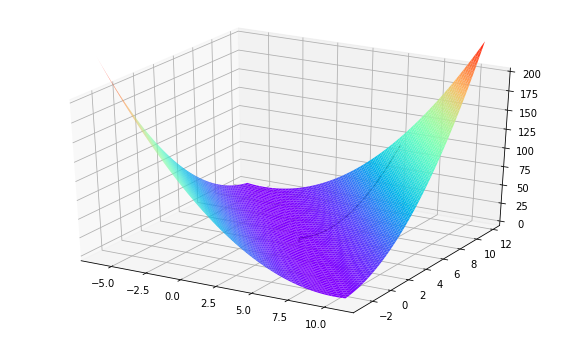

In [25]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111, projection='3d')

X = np.arange(-6, 11, 0.25)
Y = np.arange(-3, 12, 0.25)

X, Y = np.meshgrid(X, Y)    # x-y 平面的网格

Z = np.square(7 - 1*X - Y)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))

ax.plot(g_a_array,g_b_array,error_array,color='black',linewidth=1)

ax.set_zlim(-2,200)

plt.show()


### In real world

The simple linear function:

$ax + b = y$

 

In fact, we have so many x:

$a_1x_1 + a_2x_2 + a_3x_3 + ... + a_nx_n + b = y$

 

And, we use w instead of a:

$w_1x_1 + w_2x_2 + w_3x_3 + ... + w_nx_n + b = y$



If we create an x name $x_0$, and it's value is 1, replace b with $w_0$:

$w_1x_1 + w_2x_2 + w_3x_3 + ... + w_nx_n + x_0w_0 = y$

$w_0x_0 + w_1x_1 + w_2x_2 + w_3x_3 + ... + w_nx_n = y$



That is:

$\sum_{n=0}^Nw_nx_n = y$

If we have Vector W and Vector X:

$\begin{bmatrix}
   w_0  \\
   w_1  \\
   ...  \\
   w_n 
  \end{bmatrix}  and \begin{bmatrix}
   x_0  \\
   x_1  \\
   ...  \\
   x_n 
  \end{bmatrix}$
  
We got:
  
$\begin{bmatrix}
   w_0  &
   w_1  &
   ...  &
   w_n 
  \end{bmatrix}  
  \begin{bmatrix}
   x_0  \\
   x_1  \\
   ...  \\
   x_n 
  \end{bmatrix} = y $
  
That is:

$W^TX = y$

In [26]:

guess_a = 8
guess_b = 8

step_size = 0.01

g_a_list = []
g_b_list = []
error_list = []

for i in range(5000):
    
    if i%20 < 10:
        d_a = derivative_a(1,7,guess_a,guess_b)
        d_b = derivative_b(1,7,guess_a,guess_b)
    else:
        
        d_a = derivative_a(2,10,guess_a,guess_b)
        d_b = derivative_b(2,10,guess_a,guess_b)
    

    guess_a = guess_a - step_size*d_a
    guess_b = guess_b - step_size*d_b
    
    g_a_list.append(guess_a)
    g_b_list.append(guess_b)
    error_1 = np.square(7 - 1*guess_a - guess_b)
    error_2 = np.square(10 - 2*guess_a - guess_b)
    average_error = (error_1 + error_2)/2
    error_list.append(average_error)

    if i==1 or i%100 == 0:
        print ('----------------')
        print ('Derivative:' + str((d_a, d_b)))
        print ('Guess     :' + str((guess_a, guess_b)))
        print ('S1 Error  :' + str((np.square(7 - 1*guess_a - guess_b))))
        print ('S2 Error  :' + str((np.square(10 - 2*guess_a - guess_b))))
        
        
      

----------------
Derivative:(18, 18)
Guess     :(7.82, 7.82)
S1 Error  :74.6496
S2 Error  :181.1716
----------------
Derivative:(17.28, 17.28)
Guess     :(7.647200000000001, 7.647200000000001)
S1 Error  :68.79707136000002
S2 Error  :167.48501056000003
----------------
Derivative:(0.3269337567841255, 0.3269337567841255)
Guess     :(2.800042537592325, 4.356885665664055)
S1 Error  :0.024626460977275545
S2 Error  :0.0018515171431093681
----------------
Derivative:(0.27087837161366934, 0.27087837161366934)
Guess     :(2.823730820861511, 4.30629079751305)
S1 Error  :0.01690562124474011
S2 Error  :0.002138836876613202
----------------
Derivative:(0.23419857823576606, 0.23419857823576606)
Guess     :(2.847590969210554, 4.264824348342614)
S1 Error  :0.012637203620579632
S2 Error  :0.0015994970984256369
----------------
Derivative:(0.20249350537943656, 0.20249350537943656)
Guess     :(2.8682236216768513, 4.228973260905279)
S1 Error  :0.009447233983684257
S2 Error  :0.0011957415257031385
--------

In [27]:
g_a_array = np.array(g_a_list)
g_b_array = np.array(g_b_list)
error_array = np.array(error_list)


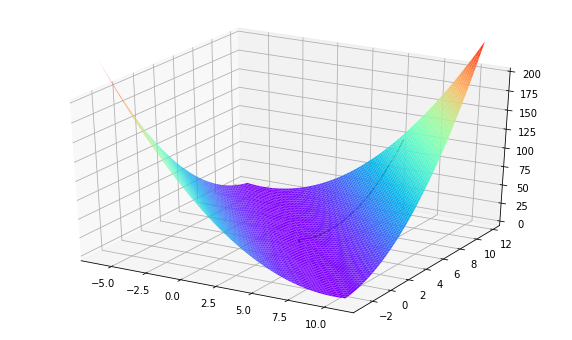

In [28]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111, projection='3d')

X = np.arange(-6, 11, 0.25)
Y = np.arange(-3, 12, 0.25)

X, Y = np.meshgrid(X, Y)    # x-y 平面的网格

Z = np.square(7 - 1*X - Y)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))

ax.plot(g_a_array,g_b_array,error_array,color='black',linewidth=1)

ax.set_zlim(-2,200)

plt.show()